## MS Dhoni Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [14]:
df = pd.read_csv('MS_Dhoni_ODI_record.csv')

In [15]:
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,v Bangladesh,Chattogram,23/12/2004,ODI # 2199
1,12,12,11,109.09,2,0,v Bangladesh,Dhaka,26/12/2004,ODI # 2201
2,7*,7,2,350,0,1,v Bangladesh,Dhaka,27/12/2004,ODI # 2202
3,3,3,7,42.85,0,0,v Pakistan,Kochi,02/04/2005,ODI # 2235
4,148,148,123,120.32,15,4,v Pakistan,Visakhapatnam,05/04/2005,ODI # 2236
...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,v West Indies,Manchester,27/06/2019,ODI # 4175
346,42*,42,31,135.48,4,1,v England,Birmingham,30/06/2019,ODI # 4179
347,35,35,33,106.06,4,0,v Bangladesh,Birmingham,02/07/2019,ODI # 4182
348,DNB,-,-,-,-,-,v Sri Lanka,Leeds,06/07/2019,ODI # 4187


### Data cleaning

In [25]:
df['opposition'] = df['opposition'].str.replace('^v ', '', regex=True)
df.drop('odi_number', inplace=True, axis=1)

In [26]:
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date
0,0,0,1,0,0,0,Bangladesh,Chattogram,23/12/2004
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,26/12/2004
2,7*,7,2,350,0,1,Bangladesh,Dhaka,27/12/2004
3,3,3,7,42.85,0,0,Pakistan,Kochi,02/04/2005
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,05/04/2005
...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,West Indies,Manchester,27/06/2019
346,42*,42,31,135.48,4,1,England,Birmingham,30/06/2019
347,35,35,33,106.06,4,0,Bangladesh,Birmingham,02/07/2019
348,DNB,-,-,-,-,-,Sri Lanka,Leeds,06/07/2019


In [27]:
numeric_cols = ['runs_scored', 'balls_faced', 'strike_rate', 'fours', 'sixes']
for _col in numeric_cols:
    df[_col] = pd.to_numeric(df[_col], errors='coerce')

In [28]:
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date
0,0,0.0,1.0,0.00,0.0,0.0,Bangladesh,Chattogram,23/12/2004
1,12,12.0,11.0,109.09,2.0,0.0,Bangladesh,Dhaka,26/12/2004
2,7*,7.0,2.0,350.00,0.0,1.0,Bangladesh,Dhaka,27/12/2004
3,3,3.0,7.0,42.85,0.0,0.0,Pakistan,Kochi,02/04/2005
4,148,148.0,123.0,120.32,15.0,4.0,Pakistan,Visakhapatnam,05/04/2005
...,...,...,...,...,...,...,...,...,...
345,56*,56.0,61.0,91.80,3.0,2.0,West Indies,Manchester,27/06/2019
346,42*,42.0,31.0,135.48,4.0,1.0,England,Birmingham,30/06/2019
347,35,35.0,33.0,106.06,4.0,0.0,Bangladesh,Birmingham,02/07/2019
348,DNB,NaN,NaN,NaN,NaN,NaN,Sri Lanka,Leeds,06/07/2019


In [30]:
df.tail()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date
345,56*,56.0,61.0,91.80,3.0,2.0,West Indies,Manchester,27/06/2019
346,42*,42.0,31.0,135.48,4.0,1.0,England,Birmingham,30/06/2019
347,35,35.0,33.0,106.06,4.0,0.0,Bangladesh,Birmingham,02/07/2019
348,DNB,NaN,NaN,NaN,NaN,NaN,Sri Lanka,Leeds,06/07/2019
349,50,50.0,72.0,69.44,1.0,1.0,New Zealand,Manchester,09/07/2019


Batting average = Total run / total innings played - not out

total runs = sum (runs_scored)

not out = if ends with star

total innings played =

In [33]:
df['score'] = df['score'].apply(str)
df['not_out'] = np.where(df['score'].str.strip().str.endswith('*'), 1, 0)
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,not_out
0,0,0.0,1.0,0.00,0.0,0.0,Bangladesh,Chattogram,23/12/2004,0
1,12,12.0,11.0,109.09,2.0,0.0,Bangladesh,Dhaka,26/12/2004,0
2,7*,7.0,2.0,350.00,0.0,1.0,Bangladesh,Dhaka,27/12/2004,1
3,3,3.0,7.0,42.85,0.0,0.0,Pakistan,Kochi,02/04/2005,0
4,148,148.0,123.0,120.32,15.0,4.0,Pakistan,Visakhapatnam,05/04/2005,0
...,...,...,...,...,...,...,...,...,...,...
345,56*,56.0,61.0,91.80,3.0,2.0,West Indies,Manchester,27/06/2019,1
346,42*,42.0,31.0,135.48,4.0,1.0,England,Birmingham,30/06/2019,1
347,35,35.0,33.0,106.06,4.0,0.0,Bangladesh,Birmingham,02/07/2019,0
348,DNB,NaN,NaN,NaN,NaN,NaN,Sri Lanka,Leeds,06/07/2019,0


In [39]:
df_new = df.loc[((df['score'] != "DNB") & (df['score'] != "TDNB")), 'runs_scored':]
df_new

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,not_out
0,0.0,1.0,0.00,0.0,0.0,Bangladesh,Chattogram,23/12/2004,0
1,12.0,11.0,109.09,2.0,0.0,Bangladesh,Dhaka,26/12/2004,0
2,7.0,2.0,350.00,0.0,1.0,Bangladesh,Dhaka,27/12/2004,1
3,3.0,7.0,42.85,0.0,0.0,Pakistan,Kochi,02/04/2005,0
4,148.0,123.0,120.32,15.0,4.0,Pakistan,Visakhapatnam,05/04/2005,0
...,...,...,...,...,...,...,...,...,...
344,28.0,52.0,53.84,3.0,0.0,Afghanistan,Southampton,22/06/2019,0
345,56.0,61.0,91.80,3.0,2.0,West Indies,Manchester,27/06/2019,1
346,42.0,31.0,135.48,4.0,1.0,England,Birmingham,30/06/2019,1
347,35.0,33.0,106.06,4.0,0.0,Bangladesh,Birmingham,02/07/2019,0


In [41]:
for _col in numeric_cols:
    df_new[_col] = pd.to_numeric(df_new[_col], errors='coerce')

In [42]:
df_new

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,not_out
0,0.0,1.0,0.00,0.0,0.0,Bangladesh,Chattogram,23/12/2004,0
1,12.0,11.0,109.09,2.0,0.0,Bangladesh,Dhaka,26/12/2004,0
2,7.0,2.0,350.00,0.0,1.0,Bangladesh,Dhaka,27/12/2004,1
3,3.0,7.0,42.85,0.0,0.0,Pakistan,Kochi,02/04/2005,0
4,148.0,123.0,120.32,15.0,4.0,Pakistan,Visakhapatnam,05/04/2005,0
...,...,...,...,...,...,...,...,...,...
344,28.0,52.0,53.84,3.0,0.0,Afghanistan,Southampton,22/06/2019,0
345,56.0,61.0,91.80,3.0,2.0,West Indies,Manchester,27/06/2019,1
346,42.0,31.0,135.48,4.0,1.0,England,Birmingham,30/06/2019,1
347,35.0,33.0,106.06,4.0,0.0,Bangladesh,Birmingham,02/07/2019,0


In [48]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
first_match_date = df['date'].dt.date.min().strftime('%B %d, %Y')
print('First Match: ', first_match_date)

First Match:  December 23, 2004


In [49]:
last_match_date = df['date'].dt.date.max().strftime('%B %d, %Y')
last_match_date

'July 09, 2019'

In [52]:
# No of matches
df.shape

(350, 10)

In [53]:
# No of innings
df_new.shape

(297, 9)

In [57]:
not_outs = df_new['not_out'].sum()
int(not_outs)

84

In [58]:
runs_scored = df_new['runs_scored'].sum()
runs_scored

np.float64(10773.0)

In [60]:
balls_faced = df_new['balls_faced'].sum()
balls_faced

np.float64(12303.0)

In [62]:
carrer_sr = runs_scored / balls_faced * 100
carrer_sr

np.float64(87.56400877834675)

In [67]:
carrer_avg = runs_scored / (df_new.shape[0] - not_outs)
'{:.2f}'.format(carrer_avg)

'50.58'

In [69]:
hundereds = (df_new['runs_scored'] >= 100).sum()
hundereds

np.int64(10)

In [72]:
fifties = ((df_new['runs_scored'] >= 50) & (df_new['runs_scored'] < 100)).sum()
fifties

np.int64(73)

In [73]:
fours = df_new.fours.sum()
fours

np.float64(826.0)

In [74]:
opposition_counts = df['opposition'].value_counts()
opposition_counts

opposition
Sri Lanka       67
Australia       55
England         48
West Indies     39
South Africa    37
Pakistan        36
New Zealand     28
Bangladesh      21
Zimbabwe         6
Africa XI        3
Hong Kong        2
Afghanistan      2
Ireland          2
Scotland         1
Bermuda          1
Netherlands      1
U.A.E.           1
Name: count, dtype: int64

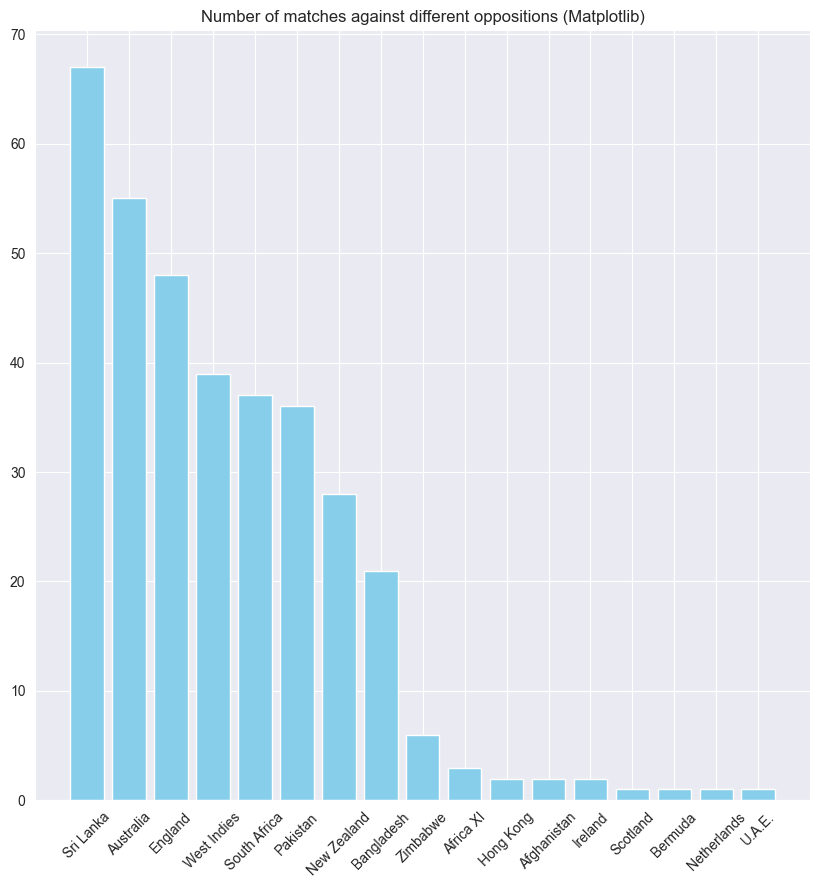

In [75]:
plt.figure(figsize = (10,10))
plt.bar(opposition_counts.index, opposition_counts.values, color = 'skyblue')
plt.title('Number of matches against different oppositions (Matplotlib)')
plt.xticks(rotation = 45)
plt.show()

In [86]:
df['opposition_count'] = df['opposition'].map(opposition_counts)
df = df.sort_values(by=['opposition_count', 'opposition'], ascending=[False, True])
df = df.drop(columns=['opposition_count']).reset_index(drop=True)

ValueError: Data must be 1-dimensional, got ndarray of shape (17, 1) instead

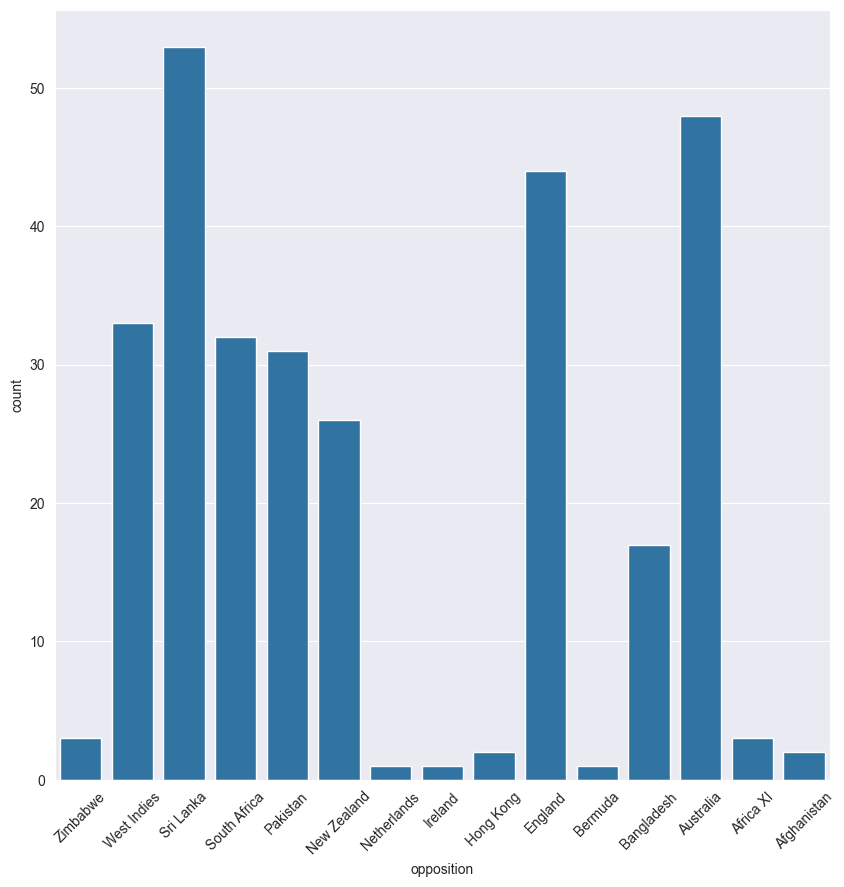

In [84]:
plt.figure(figsize = (10,10))
df_sorted = df_new.sort_values('opposition', ascending = False)
sns.countplot(x='opposition', data=df_sorted)
plt.xticks(rotation = 45)
plt.show()

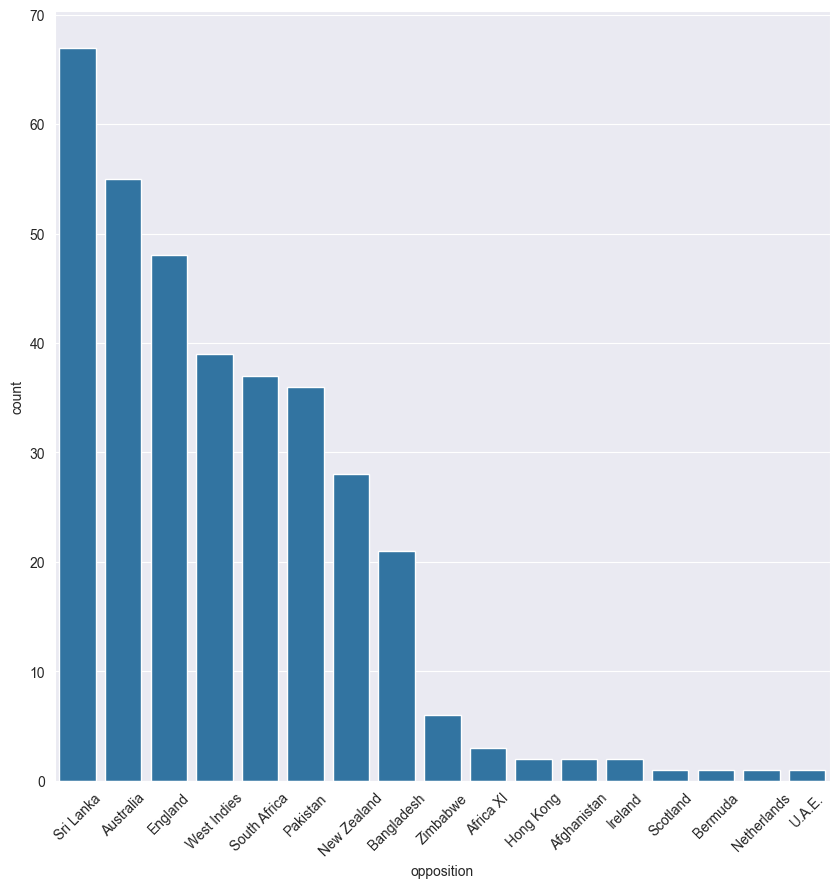

In [79]:
opposition_counts = pd.DataFrame(opposition_counts)
plt.figure(figsize = (10,10))
sns.barplot(x='opposition', y='count', data=opposition_counts)
plt.xticks(rotation = 45)
plt.show()

### Run scored against each

In [91]:
runs_scored_by_opposition = df_new.groupby('opposition')['runs_scored'].sum().reset_index()
runs_scored_by_opposition

,opposition,runs_scored
0,Afghanistan,36.0
1,Africa XI,174.0
2,Australia,1660.0
3,Bangladesh,569.0
4,Bermuda,29.0
5,England,1546.0
6,Hong Kong,109.0
7,Ireland,34.0
8,Netherlands,19.0
9,New Zealand,940.0


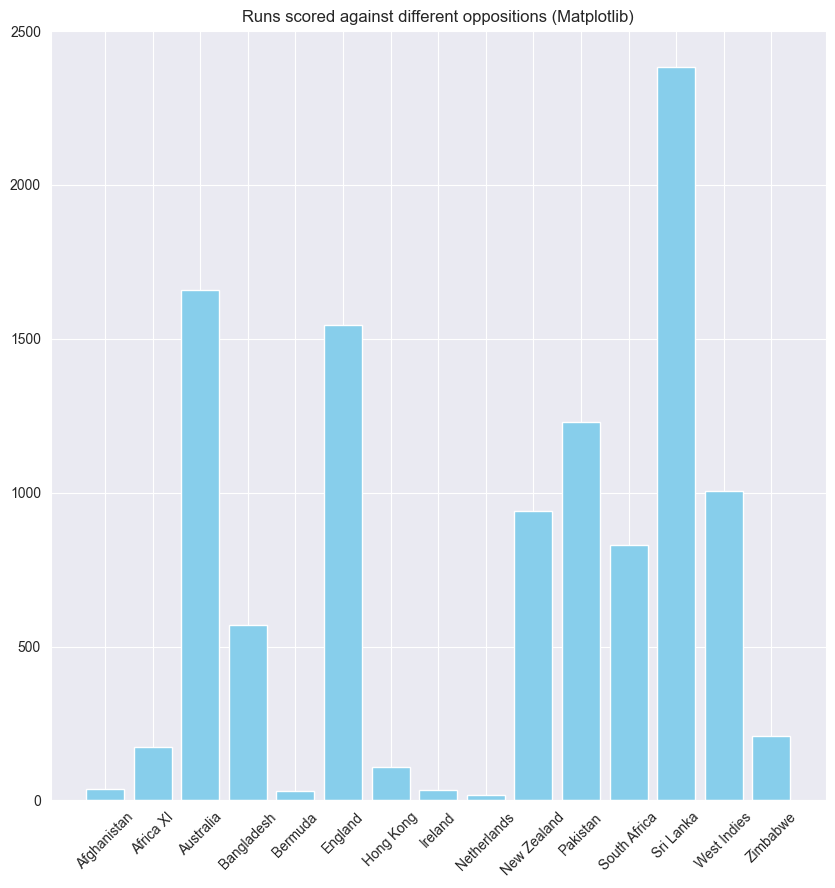

In [94]:
plt.figure(figsize = (10,10))
plt.bar(runs_scored_by_opposition['opposition'], runs_scored_by_opposition['runs_scored'], color = 'skyblue')
plt.title('Runs scored against different oppositions (Matplotlib)')
plt.xticks(rotation = 45)
plt.show()

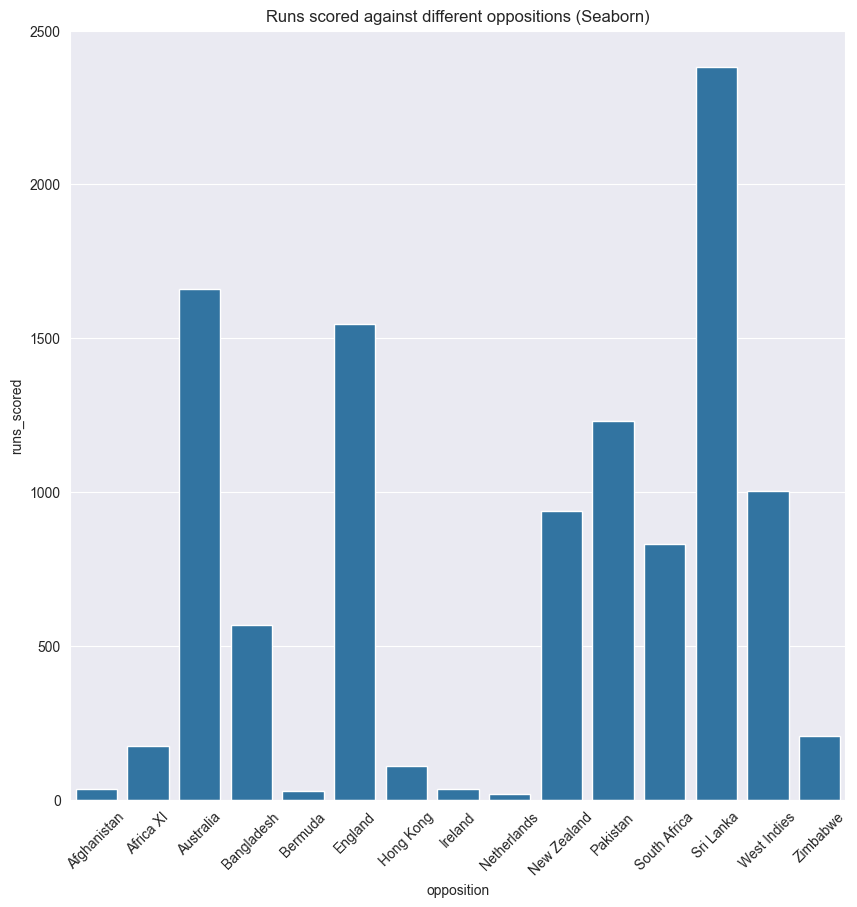

In [96]:
plt.figure(figsize = (10,10))
sns.barplot(x='opposition', y='runs_scored', data=runs_scored_by_opposition)
plt.title("Runs scored against different oppositions (Seaborn)")
plt.xticks(rotation = 45)
plt.show()